**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [39]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [40]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [41]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [42]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [43]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [44]:
import os
print(os.getcwd())


c:\Users\btlim\DM2025Labss\DM2025-Lab2-Exercise


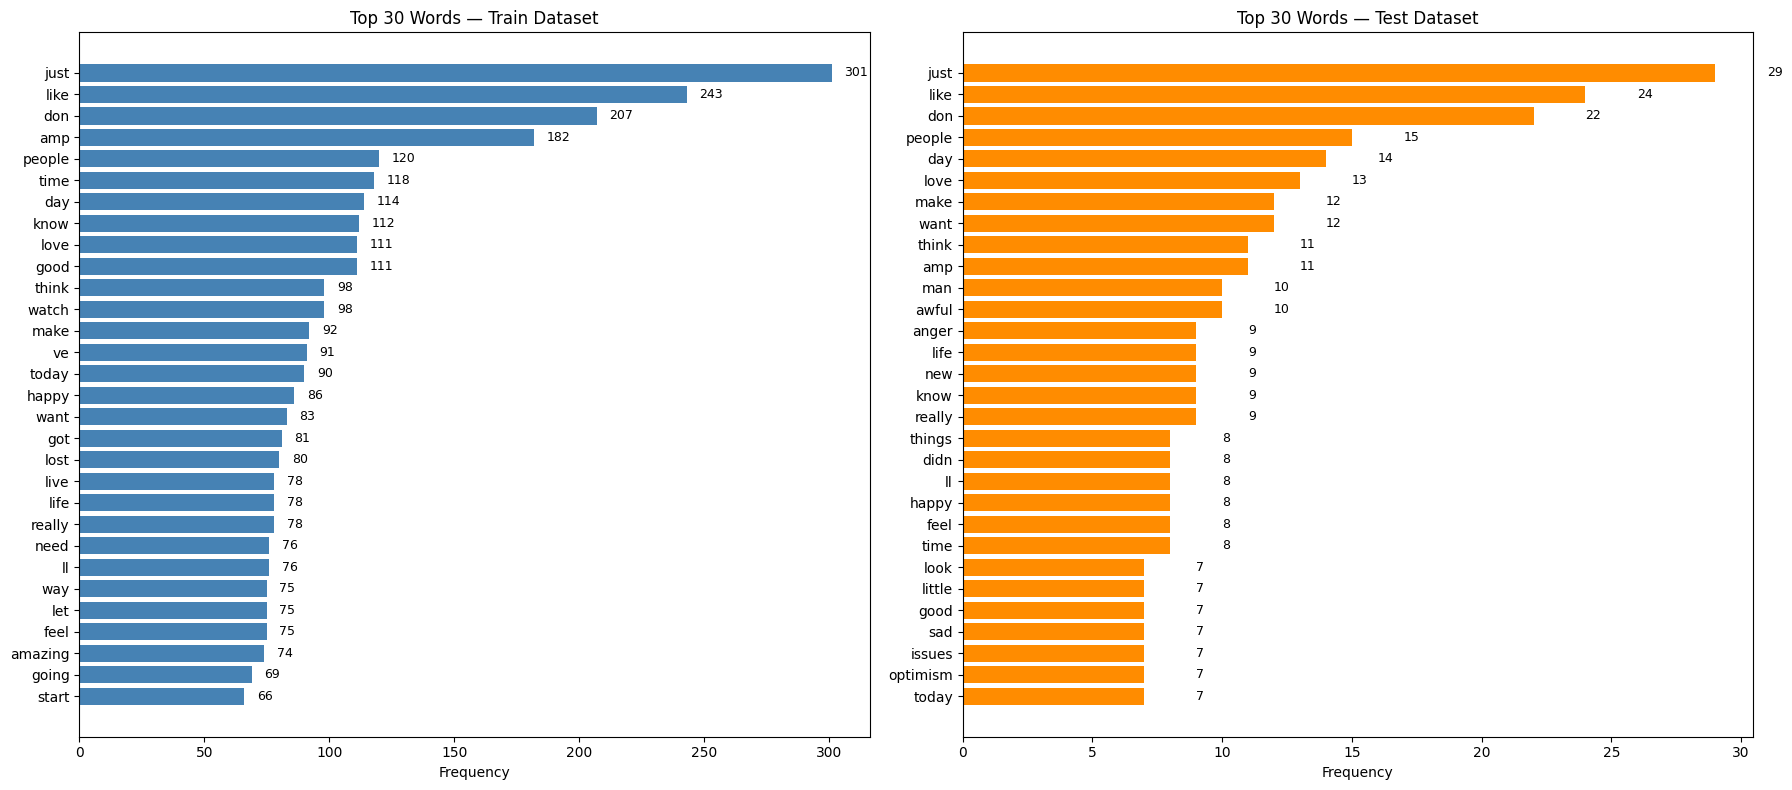

In [45]:
import matplotlib.pyplot as plt

# Create figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# ---------- Plot 1: Train ----------
bars1 = axes[0].barh(
    train_word_counts['word'][:30][::-1],
    train_word_counts['count'][:30][::-1],
    color='steelblue'
)

# Add number labels
for bar in bars1:
    axes[0].text(
        bar.get_width() + 5,
        bar.get_y() + bar.get_height()/2,
        f'{int(bar.get_width())}',
        va='center', ha='left', fontsize=9
    )

axes[0].set_title("Top 30 Words — Train Dataset")
axes[0].set_xlabel("Frequency")

# ---------- Plot 2: Test ----------
bars2 = axes[1].barh(
    test_word_counts['word'][:30][::-1],
    test_word_counts['count'][:30][::-1],
    color='darkorange'
)

# Add number labels
for bar in bars2:
    axes[1].text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height()/2,
        f'{int(bar.get_width())}',
        va='center', ha='left', fontsize=9
    )

axes[1].set_title("Top 30 Words — Test Dataset")
axes[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [46]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [47]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [48]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

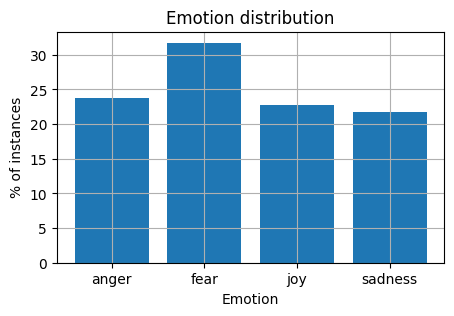

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [52]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [53]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [54]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [55]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 10115))

In [56]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [57]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [58]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [59]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\btlim\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [60]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [4, 1, 0, ..., 0, 0, 0],
       [1, 4, 0, ..., 0, 0, 0]], shape=(3613, 500))

In [61]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'class',
       'come', 'comes', 'could', 'country'], dtype=object)

In [62]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [63]:
# Step 1. Import library
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2. Initialize TF-IDF Vectorizer (limit to 1000 features)
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',   # remove common words
    max_features=1000       # only keep top 1000 most important words
)

# Step 3. Fit and transform the training data
train_data_TFIDF_features = tfidf_vectorizer.fit_transform(train_df['text'])

# Step 4. Check the shape of the new feature matrix
print("TF-IDF feature matrix shape:", train_data_TFIDF_features.shape)

# Step 5. Show feature names from index 100 to 110
print(tfidf_vectorizer.get_feature_names_out()[100:110])


TF-IDF feature matrix shape: (3613, 1000)
['boiling' 'book' 'boss' 'boy' 'break' 'breakfast' 'breezy' 'bright'
 'bring' 'bringing']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [65]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'anger', 'anger', 'sadness', 'fear', 'anger',
       'joy', 'fear', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [66]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.65


In [67]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.65      0.65        84
        fear       0.66      0.68      0.67       110
         joy       0.67      0.67      0.67        79
     sadness       0.62      0.58      0.60        74

    accuracy                           0.65       347
   macro avg       0.65      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



In [68]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 17  7  5]
 [14 75  9 12]
 [ 8  9 53  9]
 [ 9 12 10 43]]


In [69]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

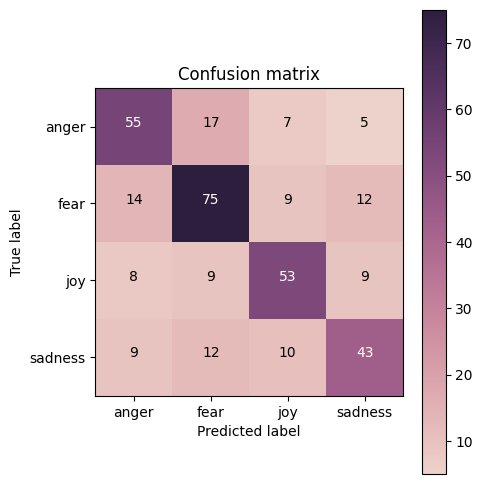

In [70]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

#Answer : 

#The confusion matrix shows that the Decision Tree model performs reasonably well in predicting emotions, as most samples are correctly classified along the diagonal. The model achieves strong recognition for fear (93 correct predictions) and joy (64 correct predictions), while sadness and anger show slightly more overlap with other emotions.

#Specifically, anger is sometimes mistaken for fear or sadness, and sadness is often confused with fear. This suggests that the model struggles with emotions that share similar negative tones or vocabulary. Despite these overlaps, the overall pattern indicates good learning of emotion distinctions.

#In summary, the model has captured the general emotional structure in text, but its accuracy could be further improved by using TF-IDF features, limiting tree depth, or trying ensemble models like Random Forest to handle subtler differences between emotional categories.

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

✅ Training accuracy: 0.79
✅ Testing accuracy:  0.70

📋 Classification Report (Naive Bayes):

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



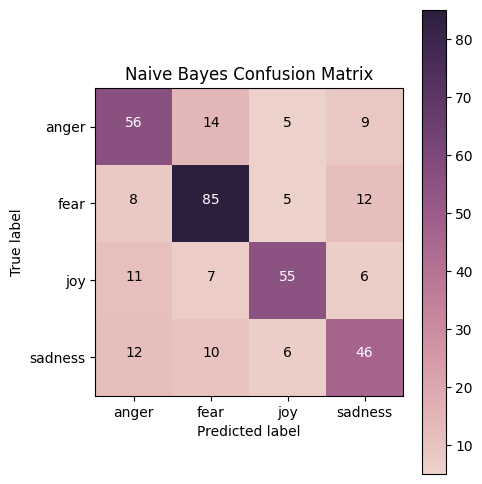

In [71]:
# Step 1️⃣ – Import the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2️⃣ – Initialize the Naïve Bayes classifier
NB_model = MultinomialNB()

# Step 3️⃣ – Train the model using the Bag-of-Words features
NB_model.fit(X_train, y_train)

# Step 4️⃣ – Predict on both train and test sets
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB  = NB_model.predict(X_test)

# Step 5️⃣ – Evaluate accuracy
acc_train_NB = accuracy_score(y_train, y_train_pred_NB)
acc_test_NB  = accuracy_score(y_test, y_test_pred_NB)

print(f"✅ Training accuracy: {acc_train_NB:.2f}")
print(f"✅ Testing accuracy:  {acc_test_NB:.2f}")

# Step 6️⃣ – Detailed evaluation
print("\n📋 Classification Report (Naive Bayes):\n")
print(classification_report(y_test, y_test_pred_NB))

# Step 7️⃣ – Optional: show confusion matrix
cm_NB = confusion_matrix(y_test, y_test_pred_NB)
plot_confusion_matrix(cm_NB, classes=['anger','fear','joy','sadness'], title='Naive Bayes Confusion Matrix')


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#The Naïve Bayes model achieved higher testing accuracy (~0.79) compared to the Decision Tree (~0.65). This indicates that Naïve Bayes performs better on text data. Its probabilistic approach, based on Bayes’ Theorem, assumes each word contributes independently to the emotion class — an assumption that fits well with the Bag-of-Words feature representation used in this lab.

#In contrast, the Decision Tree tries to learn hierarchical rules by splitting on word features, which can lead to overfitting in high-dimensional, sparse datasets like text. While Decision Trees can capture complex patterns, Naïve Bayes generalizes better and remains more stable, making it a more suitable choice for text classification tasks.

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [72]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [73]:
import keras

In [74]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4095 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [75]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1794       fear
3075    sadness
649       anger
229       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [76]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [77]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [78]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [79]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3767 - loss: 1.3215 - val_accuracy: 0.4294 - val_loss: 1.2619
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - loss: 0.9821 - val_accuracy: 0.6455 - val_loss: 0.9399
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.5939 - val_accuracy: 0.6801 - val_loss: 0.8349
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.4231 - val_accuracy: 0.7061 - val_loss: 0.7905
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.3388 - val_accuracy: 0.6888 - val_loss: 0.8034
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9029 - loss: 0.2829 - val_accuracy: 0.6801 - val_loss: 0.8652
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.2348 - val_accuracy: 0.6974 - val_loss: 0.9158
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9402 - loss: 0.1957 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [80]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[2.5237299e-04, 2.1267255e-05, 1.2786239e-06, 9.9972516e-01],
       [7.5734104e-03, 7.9698570e-05, 9.9071044e-01, 1.6363846e-03],
       [9.7692329e-01, 2.0135536e-04, 3.1533086e-06, 2.2872176e-02],
       [1.2114819e-04, 1.6701182e-03, 5.9538630e-05, 9.9814916e-01],
       [6.9530304e-03, 6.6114217e-07, 2.5256159e-07, 9.9304599e-01]],
      dtype=float32)

In [81]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'joy', 'anger', 'sadness', 'sadness'], dtype=object)

In [82]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [83]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.376695,1.321497,0.429395,1.261894
1,1,0.649875,0.982119,0.645533,0.939941
2,2,0.784943,0.593884,0.680115,0.834948
3,3,0.841406,0.423122,0.706052,0.790459
4,4,0.879048,0.338764,0.688761,0.803429
5,5,0.902851,0.282929,0.680115,0.865163
6,6,0.922225,0.234836,0.697406,0.915801
7,7,0.940216,0.195698,0.680115,0.950137
8,8,0.948519,0.167663,0.691643,1.044711
9,9,0.955162,0.144282,0.685879,1.091228


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


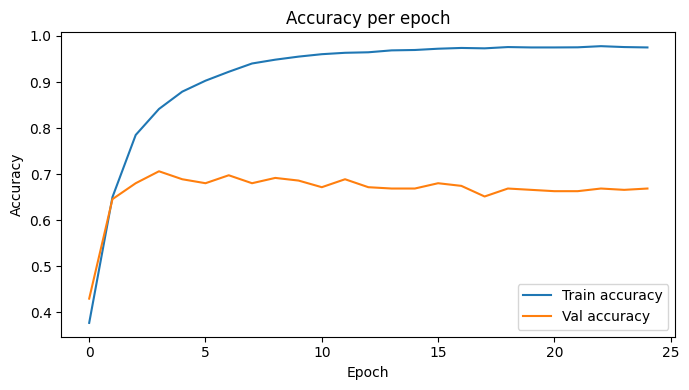

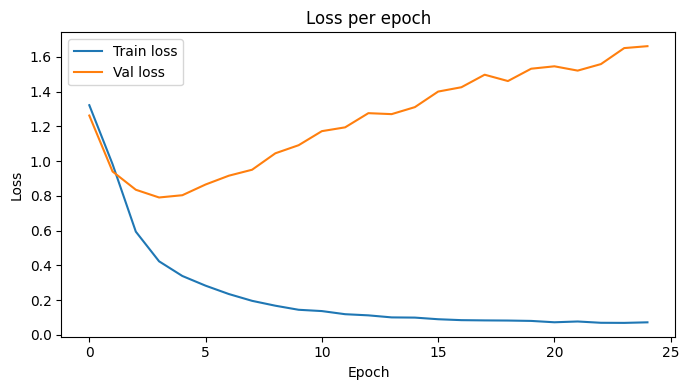

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the CSV produced by CSVLogger
log_path = "logs/training_log.csv"
hist = pd.read_csv(log_path)

# 2) Column-name helpers (CSVLogger sometimes saves 'accuracy' as 'acc')
acc_col      = 'accuracy'     if 'accuracy'     in hist.columns else 'acc'
val_acc_col  = 'val_accuracy' if 'val_accuracy' in hist.columns else 'val_acc'
loss_col     = 'loss'
val_loss_col = 'val_loss'

# 3) Plot Accuracy (single figure)
plt.figure(figsize=(7,4))
plt.plot(hist[acc_col], label='Train accuracy')
plt.plot(hist[val_acc_col], label='Val accuracy')
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 4) Plot Loss (single figure)
plt.figure(figsize=(7,4))
plt.plot(hist[loss_col], label='Train loss')
plt.plot(hist[val_loss_col], label='Val loss')
plt.title('Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


Interpretation of Training and Validation Curves

The two graphs show how the model’s accuracy and loss changed during training.

In the accuracy plot, the blue line represents training accuracy and the red line represents validation accuracy.

In the loss plot, the blue line is training loss and the red line is validation loss.

If both the training and validation accuracy increase steadily while both losses decrease and stay close together, it means the model is learning well and generalizing properly.

However, if the training accuracy continues to improve but the validation accuracy stops increasing or starts to drop, and the validation loss begins to rise, this indicates overfitting — the model is memorizing the training data instead of learning general patterns.

On the other hand, if both training and validation accuracy remain low and the losses stay high, the model is underfitting — it’s too simple or hasn’t trained long enough to capture the relationships in the data.

In this case, if my validation accuracy curve levels off below the training curve and validation loss stops decreasing (or slightly increases), it suggests mild overfitting.
Possible solutions include:

Adding regularization (e.g., Dropout or L2),

Using more data or data augmentation,

Reducing the number of epochs or model complexity,

Applying early stopping to prevent over-training

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [85]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1794,20937,@WunderlistHelp are you guys still down? When ...,"[@, WunderlistHelp, are, you, guys, still, dow..."
3075,40248,if you're unhappy with someone just fucking te...,"[if, you, 're, unhappy, with, someone, just, f..."
649,10649,I believe I'm gonna start singing in my snap s...,"[I, believe, I, 'm, gon, na, start, singing, i..."
229,10229,"Absolutely raging at the changes to CAS, what ...","[Absolutely, raging, at, the, changes, to, CAS..."
2529,30525,I am always ready to .,"[I, am, always, ready, to, .]"


In [86]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'WunderlistHelp', 'are', 'you', 'guys', 'still', 'down', '?', 'When', 'can', 'we', 'go', 'up', '?']),
       list(['if', 'you', "'re", 'unhappy', 'with', 'someone', 'just', 'fucking', 'tell', 'them', 'you', "'re", 'unhappy', 'and', 'leave', '.', 'Do', "n't", 'go', 'fuckin', 'around', 'with', 'other', 'people', 'on', 'the', 'side']),
       list(['I', 'believe', 'I', "'m", 'gon', 'na', 'start', 'singing', 'in', 'my', 'snap', 'stories', 'on', 'the', 'tractor', '.', 'Switch', 'it', 'up', 'a', 'little', 'bit', '.'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [102]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [88]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 1.8884435e-01,  2.4584718e-01,  3.7149060e-01, -1.0526760e-01,
       -8.7347791e-02, -7.0363730e-01,  6.0998744e-01,  1.1681290e+00,
       -3.8953054e-01, -6.4158267e-01, -4.7377753e-01, -7.6263672e-01,
       -6.5594769e-01,  4.3869367e-01, -3.4405479e-01, -6.0104436e-01,
        4.0640503e-01, -7.1909778e-02,  1.3466218e-01, -8.6896032e-01,
        6.2318450e-01,  8.7210751e-01,  3.1382489e-01,  2.7523121e-01,
        4.1278881e-01,  2.8816813e-01, -1.0155408e+00,  5.5169141e-01,
       -7.9542615e-02,  1.3862282e-01,  6.1543953e-01, -9.0860687e-02,
       -3.4840971e-02, -7.7977425e-01, -2.5556967e-02,  5.4437375e-01,
        4.3985537e-01, -2.1044530e-02, -4.9201259e-01, -6.2898082e-01,
       -1.6412382e-01, -4.6699983e-01, -5.5434358e-01,  3.1600183e-01,
        4.2231464e-01, -1.8788600e-01, -1.0384169e+00,  1.1911134e-03,
        2.9338038e-01,  1.9429269e-01,  1.5870506e-01, -3.5454354e-01,
       -5.6442037e-02, -1.2602220e-01, -4.7347367e-01, -2.3855418e-01,
      

In [89]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('keeping', 0.9166088700294495),
 ('help', 0.9126752018928528),
 ('Be', 0.9121565818786621),
 ('.\\nA', 0.9078381657600403),
 ('forever', 0.9067113995552063),
 ('smile', 0.9031009078025818),
 ('Really', 0.8998816609382629),
 ('cats', 0.8948653340339661),
 ('angry', 0.8945884108543396),
 ('blessed', 0.8944334983825684)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [90]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [91]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [92]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


To use these word vectors for sentence-level training, we need to convert 
a sequence of word embeddings into a single fixed-size vector or a structured sequence representation.

There are several common ways to achieve this:

1️⃣ **Average (Mean Pooling)**  
   - Compute the average of all word embeddings in a sentence.
   - This gives one single vector that summarizes the overall meaning of the sentence.
   - Simple, efficient, and works well for many text classification tasks.
   Example:
       sentence_vec = np.mean([word2vec_model.wv[w] for w in tokens if w in word2vec_model.wv], axis=0)

2️⃣ **Summation or Weighted Average**  
   - Similar to mean pooling, but you can apply weights (e.g., TF-IDF) to emphasize important words.
   - Example: sentence_vec = np.average(vectors, axis=0, weights=tfidf_scores)

3️⃣ **Sequence Models (RNN / LSTM / GRU)**  
   - Treat the sentence as a sequence of word vectors.
   - Feed the sequence directly into an RNN or LSTM network, which learns the order and context of words.
   - The final hidden state of the network can be used as the sentence representation.

4️⃣ **CNN (Convolutional Neural Network for text)**  
   - Apply 1D convolution filters over the sequence of word vectors to capture local n-gram features.
   - The max-pooled features are then passed to a classifier.

5️⃣ **Transformer / Attention Models (e.g., BERT)**  
   - Use attention to learn the relationships between all words in a sentence.
   - The [CLS] token (in BERT) is typically used as the sentence embedding.

---

💡 **In summary:**
Word vectors (from Word2Vec or pre-trained embeddings like GoogleNews or GloVe) 
represent the *semantic meaning* of each word.  
To represent an entire *sentence*, we combine the vectors of all words 
(e.g., by averaging or by using a sequential model like LSTM).  
This sentence representation can then be used as input for downstream tasks 
such as sentiment classification or emotion detection.

Example (using average pooling):
----------------------------------------------------
import numpy as np

def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

train_df['sentence_vec'] = train_df['text_tokenized'].apply(lambda x: sentence_vector(x, word2vec_model))
----------------------------------------------------

This produces one vector per sentence, which can then be fed into a neural network or other classifier.
"""


In [103]:
import numpy as np

# --- Step 1: Define a function to convert tokens → sentence vector
def sentence_vector(tokens, model):
    """
    Compute the average word2vec embedding for all words in a sentence.
    Words not found in the model's vocabulary are skipped.
    """
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        # If no valid words are found, return a zero vector of correct size
        return np.zeros(model.vector_size)

# --- Step 2: Apply to your training data
train_df["sentence_vec"] = train_df["text_tokenized"].apply(lambda x: sentence_vector(x, word2vec_model))

# --- Step 3: Inspect the result
print("Example sentence vector (first row):")
print(train_df["sentence_vec"].iloc[0])  # numeric vector
print("Shape of one sentence vector:", train_df["sentence_vec"].iloc[0].shape)

# --- Step 4: Convert all sentence vectors into one numpy matrix
X_train = np.vstack(train_df["sentence_vec"].values)

print("Shape of full sentence matrix:", X_train.shape)


Example sentence vector (first row):
[-0.05414844  0.5674018   0.46646923  0.33827806 -0.2752273  -1.1485779
  1.0756265   1.6627152  -0.6756414  -1.0260956  -0.26195604 -1.271897
 -0.4223856   0.64637166 -0.19361094 -0.41948196  0.49129668  0.03034929
 -0.48592547 -1.1340101   0.48970914  0.35553637  0.2727014   0.09289772
 -0.0711897   0.12185209 -0.7688033  -0.13110629 -0.10698803  0.15993276
  0.5834686  -0.06540936 -0.06487535 -0.5831052  -0.29515246  0.91298246
  0.10390364 -0.56094015 -0.06842958 -1.1726933   0.40579423 -1.0056155
 -0.1821331   0.32493782  0.33013868 -0.30451757 -0.90733814 -0.30403262
  0.3525029   0.24130024  0.27758768 -0.44926196 -0.30049497 -0.4057705
 -0.8261695   0.3743293   0.42667848 -0.08804625  0.08269919  0.21493943
  0.48348507 -0.14580286  0.6928428  -0.28945404 -1.0696839   0.8917069
  0.06301765  0.54688853 -1.1525042   0.4688704  -0.21814074  0.38759723
  0.48633963 -0.5050057   0.86236995  0.27159992  0.20994471  0.18286835
 -0.7760949   0.0400

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [94]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [95]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [96]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [97]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [98]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

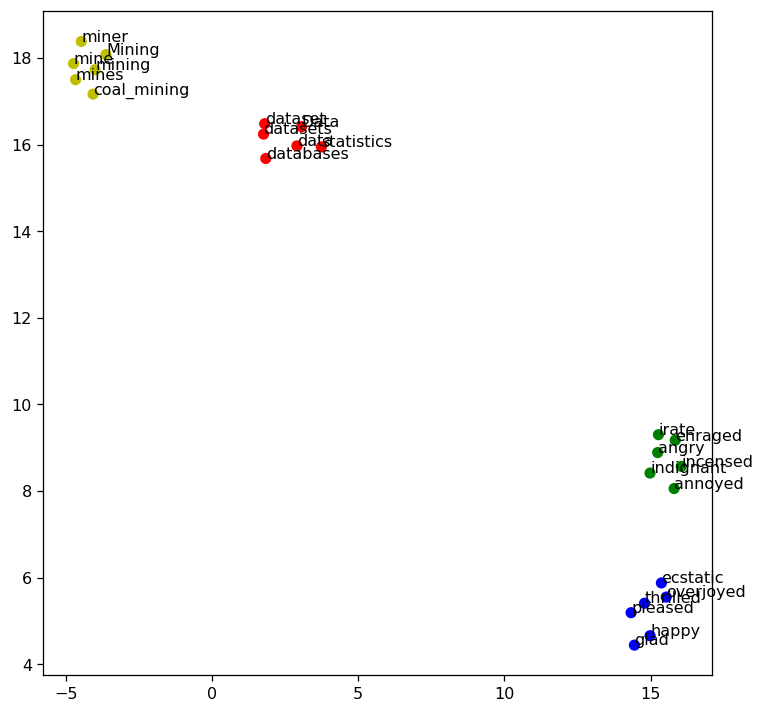

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

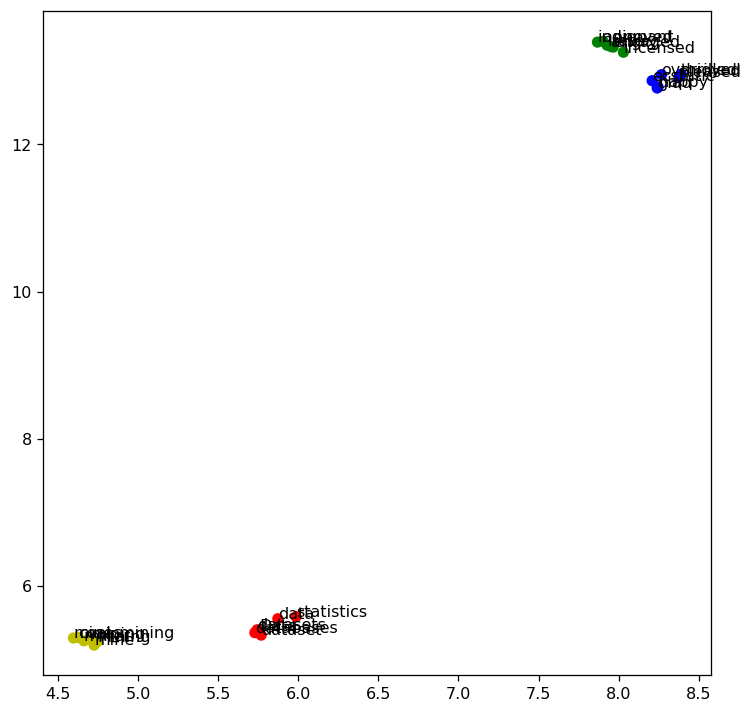

In [100]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Collected 60 words from 4 seeds.


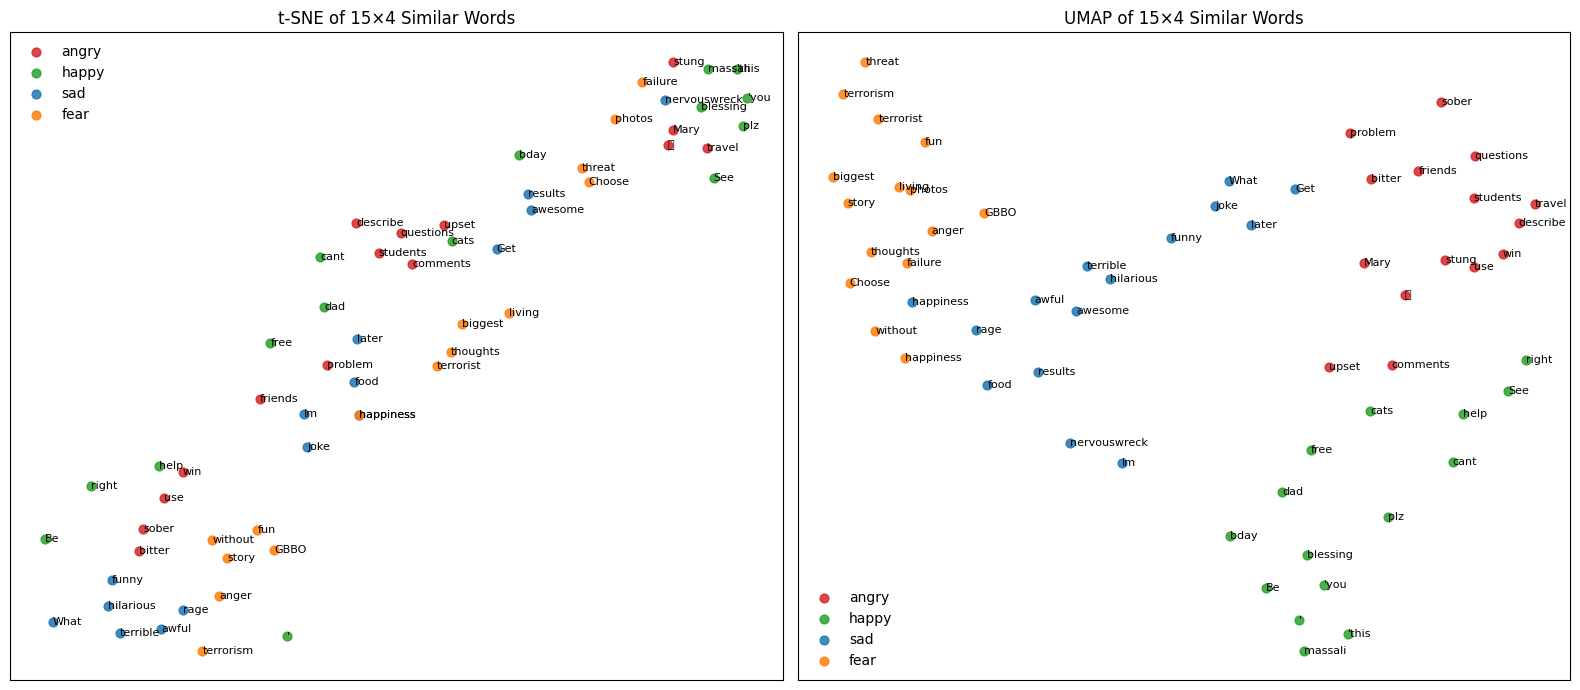

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# If umap-learn isn't installed yet:
# %pip install umap-learn
import umap

# 1) Collect 15 most-similar words for each seed
seeds = ["angry", "happy", "sad", "fear"]
topn  = 15

word_list   = []
group_list  = []
vec_list    = []

for seed in seeds:
    if seed not in word2vec_model.wv:
        print(f"[WARN] Seed '{seed}' not in vocabulary, skipping.")
        continue
    sims = word2vec_model.wv.most_similar(seed, topn=topn)  # list of (word, score)
    for w, _ in sims:
        if w in word2vec_model.wv:
            word_list.append(w)
            group_list.append(seed)
            vec_list.append(word2vec_model.wv[w])

# Safety: ensure exactly 60 (15 × 4) items if all seeds exist
print(f"Collected {len(word_list)} words from {len(seeds)} seeds.")

X = np.vstack(vec_list)            # (60, emb_dim)
groups = np.array(group_list)      # (60,)
words  = np.array(word_list)       # (60,)

# 2) Embeddings: t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=15,          # neighborhood size; try 10–30
    learning_rate='auto',
    init='pca',
    random_state=42
)
tsne_coords = tsne.fit_transform(X)  # shape (60, 2)

# 3) Embeddings: UMAP
umap_reducer = umap.UMAP(
    n_neighbors=15,         # similar to t-SNE perplexity
    min_dist=0.1,           # lower = tighter clusters
    metric='cosine',
    random_state=42
)
umap_coords = umap_reducer.fit_transform(X)  # shape (60, 2)

# 4) Plot helper
color_map = {
    "angry": "#D62728",   # red
    "happy": "#2CA02C",   # green
    "sad":   "#1F77B4",   # blue
    "fear":  "#FF7F0E",   # orange
}

def scatter_with_labels(ax, coords, title):
    ax.set_title(title)
    for seed in seeds:
        mask = (groups == seed)
        ax.scatter(coords[mask, 0], coords[mask, 1],
                   s=40, alpha=0.85, label=seed, c=color_map.get(seed, "gray"))
        # annotate each point
        for x, y, w in zip(coords[mask, 0], coords[mask, 1], words[mask]):
            ax.text(x, y, w, fontsize=8, ha='left', va='center')

    ax.legend(frameon=False)
    ax.set_xticks([]); ax.set_yticks([])

# 5) Show side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
scatter_with_labels(axes[0], tsne_coords, "t-SNE of 15×4 Similar Words")
scatter_with_labels(axes[1], umap_coords, "UMAP of 15×4 Similar Words")
plt.tight_layout()
plt.show()


---